In [745]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [675]:
# Loading the dataset
data = pd.read_csv("Customers.csv")

# **Exploring the dataset**

In [677]:
# Returns number of rows and columns of the dataset
data.shape

(200, 5)

In [678]:
# Returns an object with all of the column headers 
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [679]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [680]:
# Returns the first x number of rows when head(x). Without a number it returns 5
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [681]:
# Returns basic information on all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [682]:
# Returns basic statistics on numeric columns
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [747]:
# Returns count of null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
cluster                   0
dtype: int64

In [684]:
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [685]:
# Making the Copy of dataframe because of removing some columns and will use the main dataframe for adding the clusters after finding clusters.
df=data.copy()

In [686]:
# Dropping the column of 'CustomerID' from the copied dataframe as it does not provide any value
df.drop('CustomerID', axis=1, inplace=True)
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

# **Data Visualization**

## Gender Plot

Text(0, 0.5, 'Count')

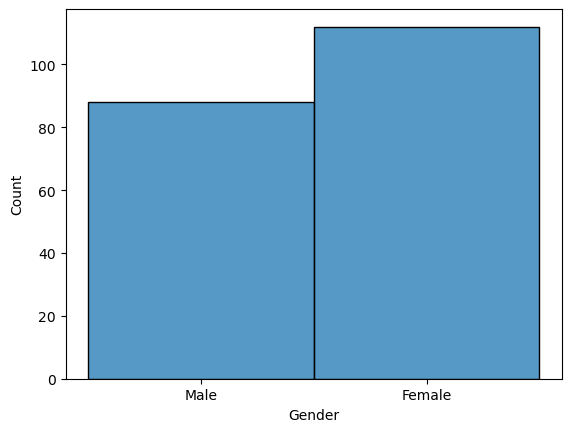

In [690]:
# Visualising the columns 'Gender' using histplot
sns.histplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')

**Gender plot - Observation**

*From the Count plot it is observed that the number of Female customers are more that the total number of Male customers.*

## Age Plot

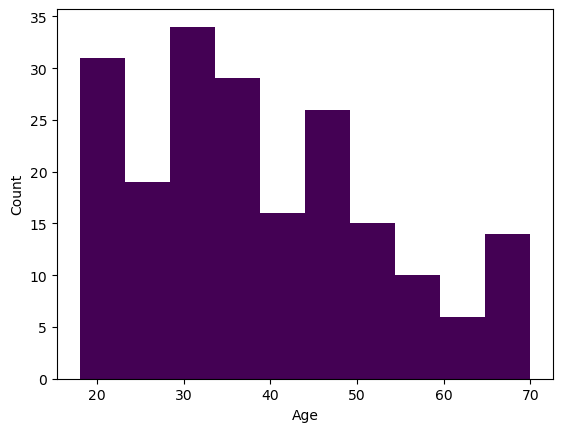

In [693]:
# Ageplot using pandas for plot
df["Age"].plot(kind="hist",cmap="viridis")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Age plot - Observation**

*From the Histogram it is evident that there are 3 age groups that are more frequently shop, they are: 15-22 years, 30-40 years and 45-50 years.*

## Age Vs Spending Score

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

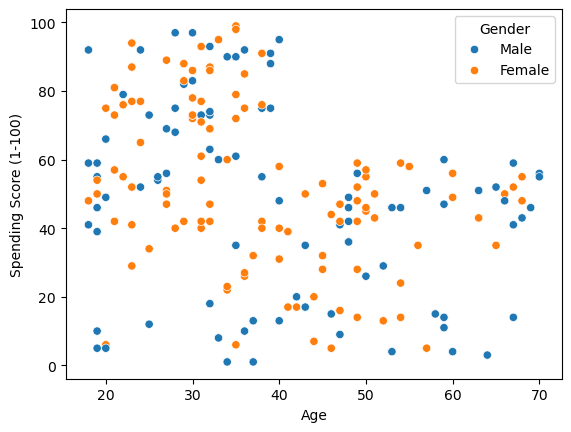

In [696]:
# Visualising the columns 'Age', 'Spending Score (1-100)' using Scatterplot 
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender')

**Age Vs Spending Score - Observation**

*1. From the Age Vs Spending Score plot we observe that customers whose spending score is more than 65 have their Age in the range of 15-42 years. Also from the Scatter plot it is observed that customers whose spending score is more than 65 consists of more Females than Males.*

*2. Also, the customers having average spending score ie: in the range of 40-60 consists of age group of the range 15-75 years and the count of Male and Female in this age group is also approximatly the same.*


## Annual Income Vs Spending Score

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

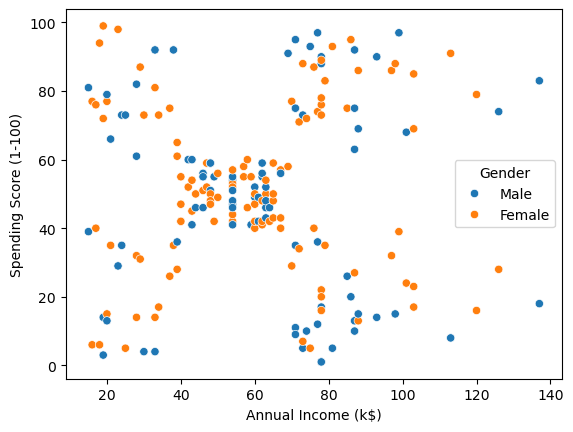

In [699]:
# Visualising the columns 'Annual Income (k$)', 'Spending Score (1-100)' using Scatterplot 
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')

**Annual Income Vs Spending Score - Observation**

*From the Annual Income Vs Spending Score plot we observe that there are 5 clusters and can be categorised as:*

---

*a. High Income, High Spending Score (Top Right Cluster)*

*b. High Income, Low Spending Score (Bottom Right Cluster)*

*c. Average Income, Average Spending Score (Center Cluster)*

*d. Low Income, High Spending Score (Top Left Cluster)*

*e. Low Income, Low Spending Score (Bottom Left Cluster)*

# **Data Preprocessing**

In [702]:
# Selecting 'Annual Income' and 'Spending Score' as the features for clustering
X=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [703]:
X.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

## Finding optimal number of clusters using Elbow Method

In [705]:
# Calculating WCSS values for 1 to 10 clusters
#WCSS:- within cluster sum of squares (for each value)
from sklearn.cluster import KMeans
wcss = []
k=range(1,11)
for i in k:
  kmeans_model = KMeans(n_clusters=i, random_state=42)
  kmeans_model.fit(X)
  wcss.append(kmeans_model.inertia_)

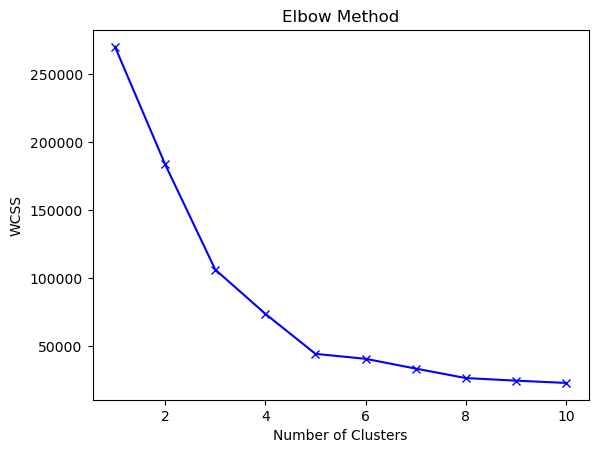

In [706]:
# Plotting the WCSS values
plt.plot(k,wcss, "bx-")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

*From the above plot it is observed that after **5 clusters** the graph starts to show consistent decreasing trend means 5 is the point where wcss starts to decrease slowly.*

## Feature Scaling

In [709]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

*Feature Scaling is performed because KMeans uses Distance (Euclidean or Manhattan) and the model perfoms faster on scaled values*

# **Model Building**

In [712]:
# Training the KMeans model with n_clusters=5
model = KMeans(n_clusters=5, random_state=42)
y_kmeans = model.fit_predict(X)

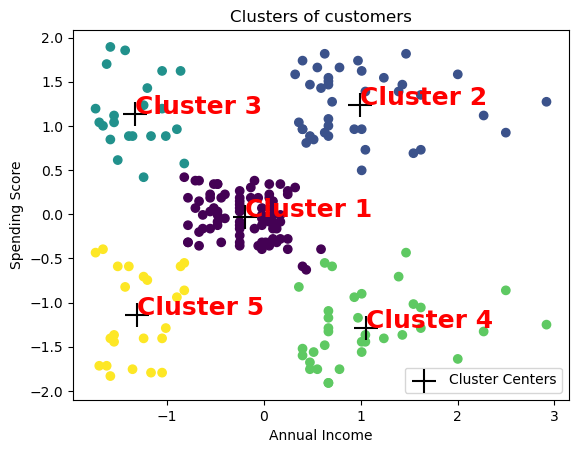

In [713]:
plt.scatter(X[:,0],X[:,1],c=y_kmeans,cmap="viridis")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s=300,c="black", marker='+', label='Cluster Centers')
for i, (x, y) in enumerate(model.cluster_centers_):
    plt.text(
        x, y, f'Cluster {i+1}',
        fontsize=18, fontweight='bold', color='red'
        )
plt.legend()
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()    

In [714]:
# Adding the clusters to the main dataframe for easier classification of the customers who comes in which cluster.
data["cluster"]=y_kmeans+1

In [715]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,3
2,3,Female,20,16,6,5
3,4,Female,23,16,77,3
4,5,Female,31,17,40,5
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,4
197,198,Male,32,126,74,2
198,199,Male,32,137,18,4


In [716]:
# showing the counts of the customers for each cluster.
data["cluster"].value_counts()

cluster
1    81
2    39
4    35
5    23
3    22
Name: count, dtype: int64

# Final Observations from K-Means Clustering Segmentation
## Cluster 2: High Income, High Spending Score
#### This segment represents our most valuable and loyal customers. We recommend prioritizing targeted communications such as new product alerts and personalized recommendation for this group, as doing so is expected to further increase revenue from these high-potential customers.

## Cluster 4: High Income, Low Spending Score
#### Customers in this cluster exhibit high purchasing power but currently demonstrate lower engagement in spending. Targeted strategies such as detailed customer feedback and enhancing advertising efforts should be implemented to convert these customers into higher-spending segments, potentially moving them towards the behavior pattern observed in Cluster 2.

## Cluster 1: Average Income, Average Spending Score
#### This group reflects moderate income and spending behavior. Marketing initiatives offering financial flexibility—such as low-cost EMIs or installment plans—could increased spending and improve customer conversion rates within this segment.

## Cluster 3: Low Income, High Spending Score
#### This segment shows promising spending enthusiasm despite lower income levels. Decisions to target this group should be aligned with the strategic priorities and risk tolerance, as investing in this cluster may or may not give that much returns depending on broader business policies.

## Cluster 5: Low Income, Low Spending Score
#### Customers in this cluster have limited income and low spending capacity. Given their financial constraints, it is recommended to deprioritize targeting efforts towards this group to optimize resource allocation and focus on more profitable segments.